In [1]:
!pip install pandas matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#dataset path
data_path = 'dataset13-22.csv'

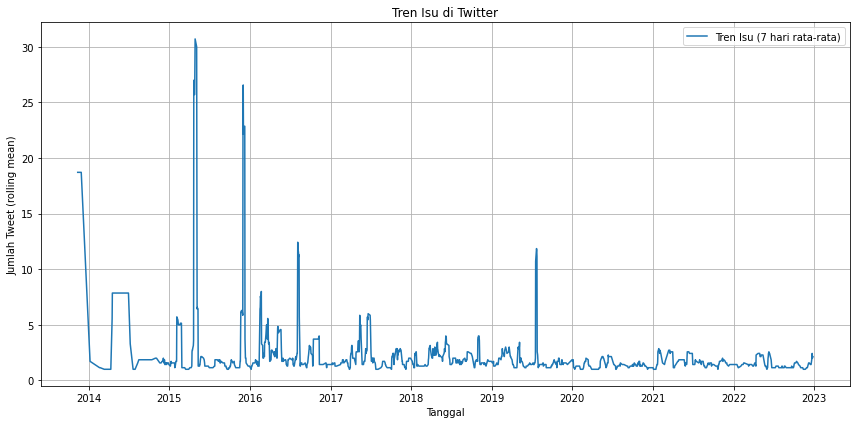

In [7]:

# Membaca dataset Twitter
data = pd.read_csv(data_path)  # Gantilah dengan nama file yang sesuai

# Menghitung jumlah tweet per hari
data['date'] = pd.to_datetime(data['date'])
daily_tweet_counts = data.groupby(data['date'].dt.date).size().reset_index(name='tweet_count')

# Menggunakan rolling mean untuk merata-ratakan data harian
rolling_mean = daily_tweet_counts['tweet_count'].rolling(window=7).mean()

# Membuat plot tren isu
plt.figure(figsize=(12, 6))
plt.plot(daily_tweet_counts['date'], rolling_mean, label='Tren Isu (7 hari rata-rata)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet (rolling mean)')
plt.title('Tren Isu di Twitter')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()


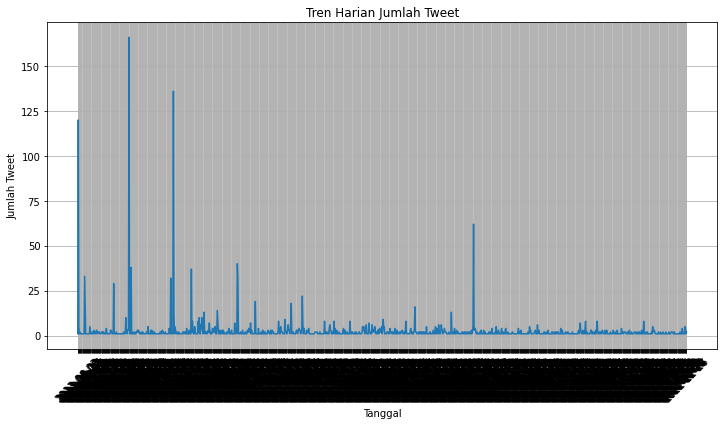

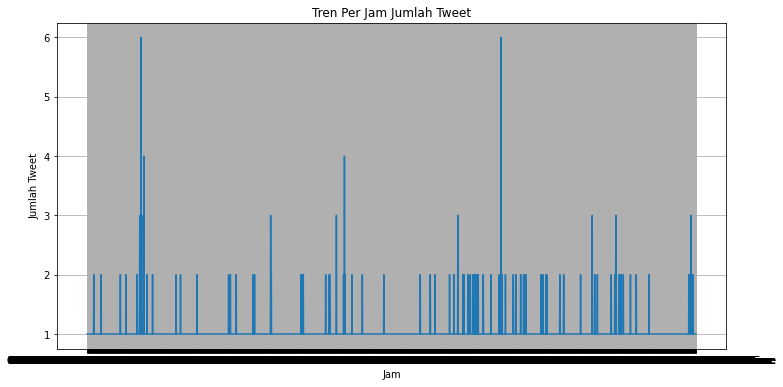

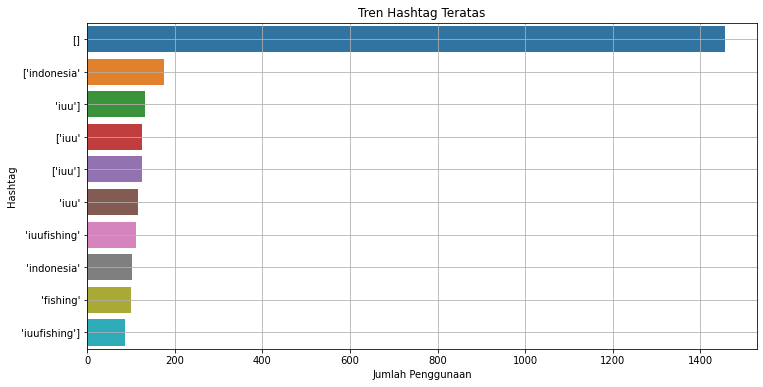

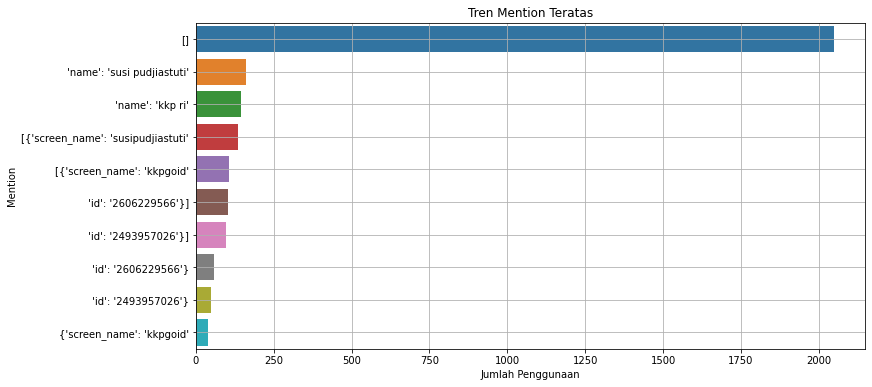

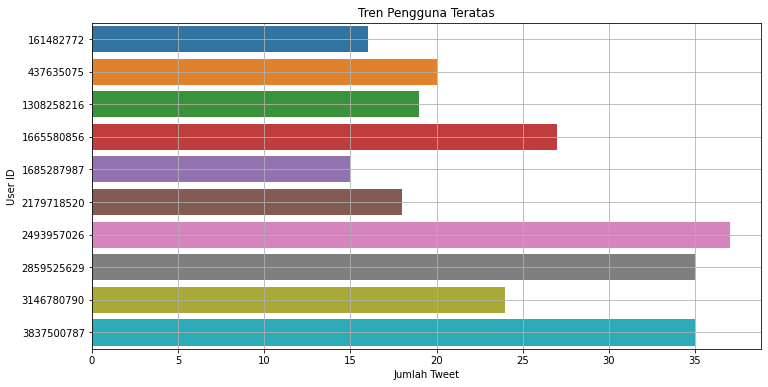

In [15]:
# Load dataset
df = pd.read_csv(data_path)  # Gantilah 'nama_file_dataset.csv' dengan nama file dataset Twitter Anda

# Konversi kolom 'created_at' ke format datetime
# 2013-04-02 09:52:50 SE Asia Standard Time
# df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S %Z')

# Menambahkan kolom tanggal (jika belum ada)
df[['date', 'hour']] = df['created_at'].str.split(' ', 1, expand=True)

# Menghitung jumlah tweet per hari
daily_tweet_count = df['date'].value_counts().sort_index()

# Menghitung jumlah tweet per jam (opsional)
# df['hour'] = df['created_at'].dt.hour
hourly_tweet_count = df['hour'].value_counts().sort_index()

# Menampilkan grafik tren harian
plt.figure(figsize=(12, 6))
plt.plot(daily_tweet_count.index, daily_tweet_count.values)
plt.title('Tren Harian Jumlah Tweet')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Menampilkan grafik tren per jam (opsional)
plt.figure(figsize=(12, 6))
plt.plot(hourly_tweet_count.index, hourly_tweet_count.values)
plt.title('Tren Per Jam Jumlah Tweet')
plt.xlabel('Jam')
plt.ylabel('Jumlah Tweet')
plt.grid(True)
plt.show()

# Analisis tren menggunakan kolom 'hashtags'
top_hashtags = df['hashtags'].str.lower().str.split(',').explode().str.strip()
top_hashtags = top_hashtags.value_counts().head(10)

# Menampilkan grafik tren hashtag teratas
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index, orient='h')
plt.title('Tren Hashtag Teratas')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Hashtag')
plt.grid(True)
plt.show()

# Analisis tren menggunakan kolom 'mentions' (jika ada)
top_mentions = df['mentions'].str.lower().str.split(',').explode().str.strip()
top_mentions = top_mentions.value_counts().head(10)

# Menampilkan grafik tren mention teratas (jika ada)
if not top_mentions.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_mentions.values, y=top_mentions.index, orient='h')
    plt.title('Tren Mention Teratas')
    plt.xlabel('Jumlah Penggunaan')
    plt.ylabel('Mention')
    plt.grid(True)
    plt.show()

# Analisis tren menggunakan kolom 'user_id' (jika ada)
top_users = df['user_id'].value_counts().head(10)

# Menampilkan grafik tren pengguna teratas (jika ada)
if not top_users.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_users.values, y=top_users.index, orient='h')
    plt.title('Tren Pengguna Teratas')
    plt.xlabel('Jumlah Tweet')
    plt.ylabel('User ID')
    plt.grid(True)
    plt.show()
